(a) Download the Vertebral Column Data Set 

In [1]:
import pandas as pd
from scipy.io import arff
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
data = arff.loadarff('/Users/myy/Desktop/DSCI552_HW1/data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])

#binary classiﬁcation task NO=0 and AB=1
df['class'] = np.where(df['class'] == b'Abnormal', 1, 0)
df.to_csv('/Users/myy/Desktop/DSCI552_HW1/data/column_2C.csv', index = False)

In [3]:
print(df.head)

<bound method NDFrame.head of      pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  class  
0        98.672

(b) Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

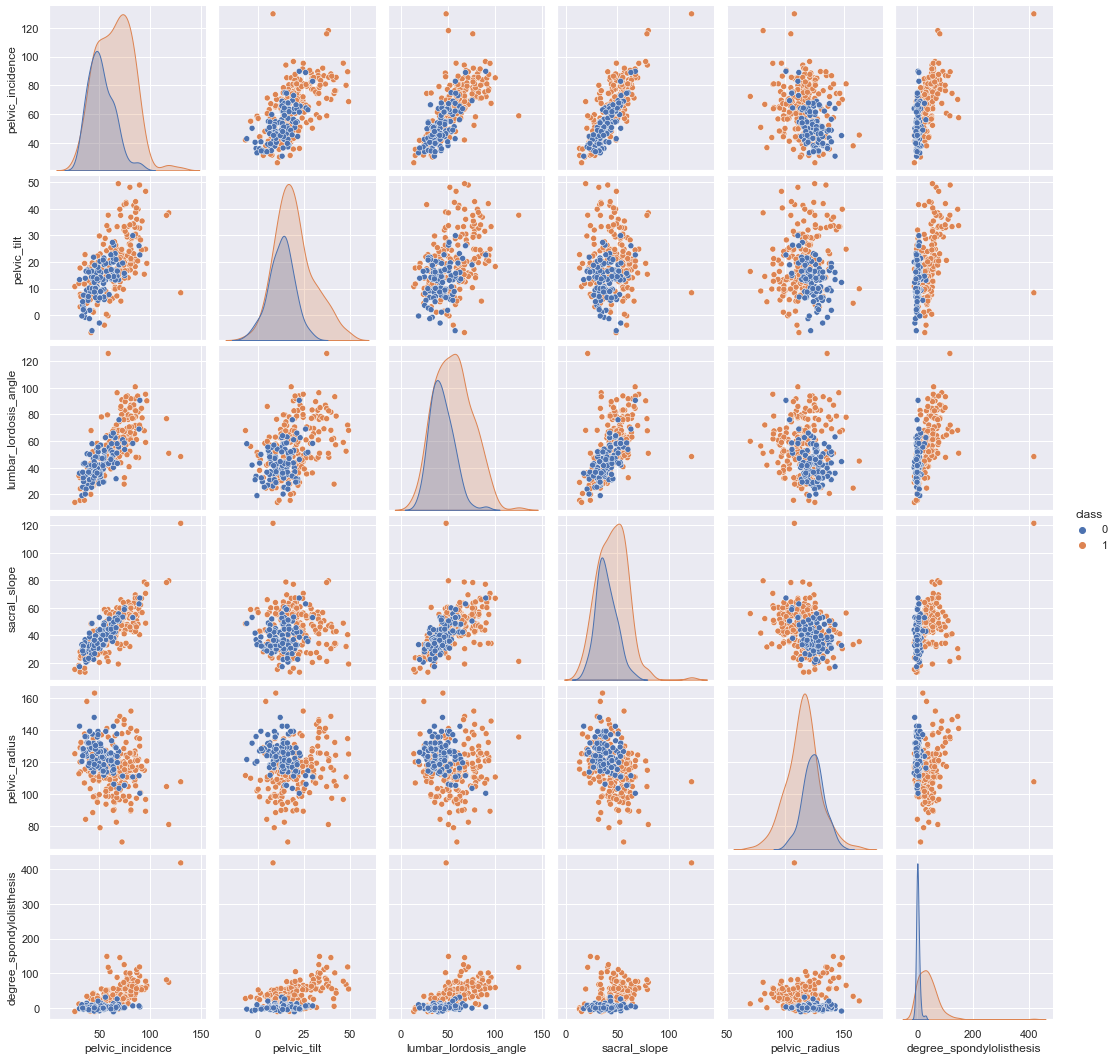

In [4]:
main_data = pd.read_csv('/Users/myy/Desktop/DSCI552_HW1/data/column_2C.csv')
sns.set()
sns.pairplot(main_data, hue = 'class', vars = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                                           'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'])
plt.show()

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1.

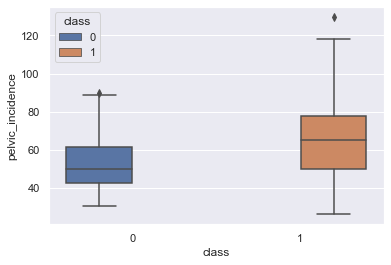

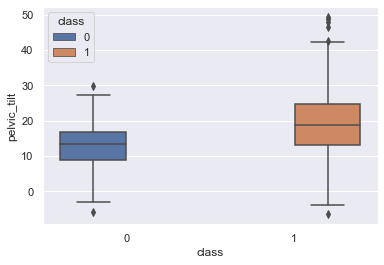

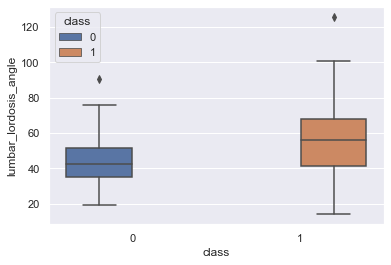

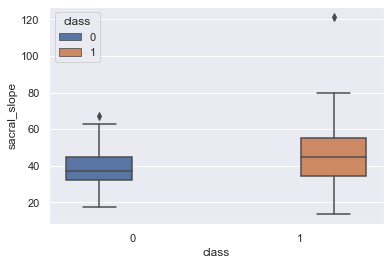

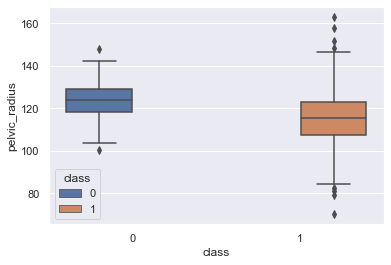

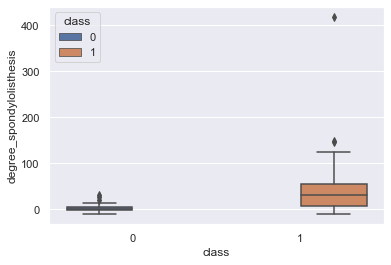

<Figure size 432x288 with 0 Axes>

In [5]:
for variable in df.columns[:-1]:
    sns.boxplot(x = 'class', y = variable, data = main_data, hue = 'class')
    plt.show()
    plt.clf()

iii. Select the ﬁrst 70 rows of Class 0 and the ﬁrst 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [6]:
df_ab = df[df['class'] == 1]
df_ab.to_csv('/Users/myy/Desktop/DSCI552_HW1/data/column_AB.csv', index = False)
df_ab = pd.read_csv('/Users/myy/Desktop/DSCI552_HW1/data/column_AB.csv')

df_no = df[df['class'] == 0]
df_no.to_csv('/Users/myy/Desktop/DSCI552_HW1/data/column_NO.csv', index = False)
df_no = pd.read_csv('/Users/myy/Desktop/DSCI552_HW1/data/column_NO.csv')

row_ab = df_ab.iloc[:, 0].size
train_ab = df_ab.head(140)
test_ab = df_ab.tail(row_ab-140)

row_no = df_no.iloc[:, 0].size
train_no = df_no.head(70)
test_no = df_no.tail(row_no-70)

test = pd.concat([test_ab, test_no])
test = test.reset_index(drop=True)

train = pd.concat([train_ab, train_no])
train = train.reset_index(drop=True)

(c) Classiﬁcation using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [7]:
x_train = train[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y_train = train['class']
x_test = test[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y_test = test['class']

ii. Test all the data in the test database with k nearest neighbors. Take de- cisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2

In [8]:
k_values = [x for x in range(1, 200, 1)]
k_star = 0
min_test = 0
test_error = []
train_error = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k, p = 2, metric = 'euclidean')
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    test_error.append(1 - accuracy_score(y_test, y_pred_test))
    train_error.append(1 - accuracy_score(y_train, y_pred_train))

    
min_test = min(test_error)
print("Minimum error:", min_test)    

k_star = 1+test_error.index(min_test)
print("Best k:", k_star)

min_train = min(train_error)
print("Minimum train error:", min_train) 


Minimum error: 0.06000000000000005
Best k: 4
Minimum train error: 0.0


In [9]:
knn = KNeighborsClassifier(n_neighbors = 4, p = 2, metric = 'euclidean')
knn.fit(x_train, y_train)
y_pred_test = knn.predict(x_test)

confusion = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix table:")
print(confusion)

tpr = confusion[0,0] / (confusion[0,0] + confusion[0,1])
print("True postive rate: ", tpr)

tnr = confusion[1,1] / (confusion[1,1] + confusion[1,0])
print("True negative rate: ", tnr)

print("F-score + precision:")
print(classification_report(y_test,y_pred_test))

Confusion matrix table:
[[25  5]
 [ 1 69]]
True postive rate:  0.8333333333333334
True negative rate:  0.9857142857142858
F-score + precision:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



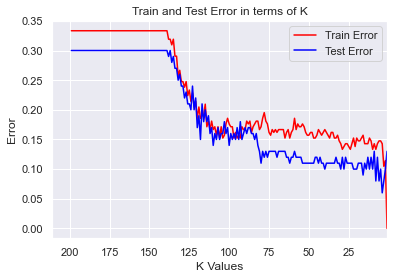

In [10]:
fig = plt.plot(k_values,train_error, color = 'red', label = 'Train Error')
fig = plt.plot(k_values,test_error, color = 'blue', label = 'Test Error')
plt.xlim([211,1])
plt.xlabel('K Values')
plt.ylabel('Error')
plt.title('Train and Test Error in terms of K')
plt.legend()

iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

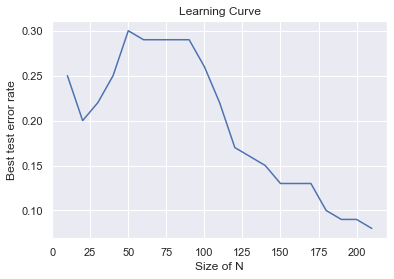

In [11]:
neighbors = np.arange(0,21)
size_n = 10
best_error_rate = np.empty(len(neighbors))
i = 0

while size_n <= 210:
    k = 1
    bestscore = 0
    
    train_ab2 = df_ab.head(size_n - int(size_n/3))
    train_no2 = df_no.head(int(size_n/3))
    train2 = pd.concat([train_ab2,train_no2])
    
    x_train2 = train2[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
    y_train2 = train2['class']
    
    while k < size_n:
        knn = KNeighborsClassifier(n_neighbors = k, p = 2, metric = 'euclidean')   
        knn.fit(x_train2, y_train2)
        score2 = knn.score(x_test, y_test, sample_weight=None)
        
        if score2 > bestscore:
            bestscore = score2
        k += 5
        
    best_error_rate[i] = 1 - bestscore
    i += 1
    size_n += 10

plt.title('Learning Curve')
plt.plot((neighbors * 10) + 10, best_error_rate)
plt.xlabel('Size of N')
plt.ylabel('Best test error rate')
plt.show()

Let us further explore some variants of KNN.

(d) Replace the Euclidean metric with the following metrics5 and test them. Sum- marize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

i. Minkowski Distance:


A. which becomes Manhattan Distance with p = 1.

In [12]:
k = 1
bestscore_man = 0
bestk_man = 1

while k <= 196:
    knn = KNeighborsClassifier(n_neighbors = k, p = 1)
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
    
    score_man = knn.score(x_test, y_test, sample_weight=None)
    if score_man > bestscore_man:
        bestscore_man = score_man
        bestk_man = k
    k += 5
    
print("Best score with Manhattan Distance with p = 1: ", bestscore_man)
print("Best k (Manhattan): ", bestk_man)

Best score with Manhattan Distance with p = 1:  0.89
Best k (Manhattan):  1


B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [13]:
bestscore_log = 0
bestk_log = 0
x = 0.1

while x <= 1:
    knn = KNeighborsClassifier(n_neighbors = 6, p = pow(10,x), metric = 'minkowski')
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    train_error.append(1 - accuracy_score(y_train, y_pred_train))
    
    score_log = knn.score(x_test, y_test, sample_weight=None)
    if score_log > bestscore_log:
        bestscore_log = score_log
        bestk_log = x
    x += 0.1
    
print("Best score for log10(p): ", bestscore_log)
print("Best k (log10(p)): ", bestk_log)

Best score for log10(p):  0.94
Best k (log10(p)):  0.6


C. which becomes Chebyshev Distance with p → ∞

In [14]:
k = 1
bestscore_cheb = 0
bestk_cheb = 1
x = 0

while k <= 196:
    knn = KNeighborsClassifier(n_neighbors = k, p = float('inf'), metric = 'chebyshev')
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    train_error.append(1 - accuracy_score(y_train, y_pred_train))
    
    score_cheb = knn.score(x_test, y_test, sample_weight=None)
    if score_cheb > bestscore_cheb:
        bestscore_cheb = score_cheb
        bestk_cheb = k
    x += 1
    k += 5
print("Best score when becomes Chebyshev Distance with p -> inf: ", bestscore_cheb)
print("Best k (Chebyshev Distance: ", bestk_cheb)

Best score when becomes Chebyshev Distance with p -> inf:  0.92
Best k (Chebyshev Distance:  16


ii. Mahalanobis Distance.

In [15]:
k = 1
i = 0
bestscore_mah = 0
bestk_mah = 1

S = x_train.cov()
SI = np.linalg.pinv(S)

while k <= 196:
    knn = KNeighborsClassifier(n_neighbors = k, metric_params = {'VI': SI}, metric = 'mahalanobis')
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
    
    score_mah = knn.score(x_test, y_test, sample_weight = None)
    if score_mah > bestscore_mah:
        bestscore_mah = score_mah
        bestk_mah = k
    i += 1
    k += 5
print("Best score with Mahalanobis Distance: ", bestscore_mah)
print("Best k (Mahalanobis): ", bestk_mah)


Best score with Mahalanobis Distance:  0.85
Best k (Mahalanobis):  1


In [16]:
table_data = {'Distance Name':['Manhattan','Chebyshev','Mahalanobis'],
              'Best k':[bestk_man, bestk_cheb, bestk_mah],
              'Test Error':[(1-bestscore_man)*100,(1-bestscore_cheb)*100,(1-bestscore_mah)*100]}
table = pd.DataFrame(table_data)
print(table)

  Distance Name  Best k  Test Error
0     Manhattan       1        11.0
1     Chebyshev      16         8.0
2   Mahalanobis       1        15.0


(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [17]:
#Euclidean

k = 1
bestscore_1 = 0
bestk_1 = 1

while k <= 196:
    knn = KNeighborsClassifier(n_neighbors = k, p = 2, weights = 'distance')
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
    
    score_1 = knn.score(x_test, y_test, sample_weight = None)
    if score_1 > bestscore_1:
        bestscore_1 = score_1
        bestk_1 = k
    k += 5
print("Best score with Euclidean: ", bestscore_1)
print("Best k with Euclidean: ", bestk_1)


Best score with Euclidean:  0.9
Best k with Euclidean:  6


In [18]:
#Manhattan

k = 1
bestscore_2 = 0
bestk_2 = 1

while k <= 196:
    knn = KNeighborsClassifier(n_neighbors = k, p = 1, weights = 'distance')
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
 
    score_2 = knn.score(x_test, y_test, sample_weight = None)
    if score_2 > bestscore_2:
        bestscore_2 = score_2
        bestk_2 = k
    k += 5
print("Best score with Manhattan: ", bestscore_2)
print("Best k with Manhattan: ", bestk_2)

Best score with Manhattan:  0.9
Best k with Manhattan:  26


In [19]:
#Chebyshev

k = 1
bestscore_3 = 0
bestk_3 = 1

while k <= 196:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'chebyshev', p = float('inf'), weights = 'distance')
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)

    score_3 = knn.score(x_test, y_test, sample_weight = None)
    if score_3 > bestscore_3:
        bestscore_3 = score_3
        bestk_3 = k
    k += 5
print("Best score with Chebyshev: ", bestscore_3)
print("Best k with Chebyshev: ", bestk_3)

Best score with Chebyshev:  0.89
Best k with Chebyshev:  16


In [20]:
table_data2 = {'Distance Name':['Euclidean','Manhattan','Chebyshev'],
               'Best K':[bestk_1, bestk_2,bestk_3],
               'TestErrors':[(1-bestscore_1)*100,(1-bestscore_2)*100,(1-bestscore_3)*100]}
table = pd.DataFrame(table_data2)
print(table)

  Distance Name  Best K  TestErrors
0     Euclidean       6        10.0
1     Manhattan      26        10.0
2     Chebyshev      16        11.0


(f) What is the lowest training error rate you achieved in this homework?

In [21]:
print("Minimum train error:", min_train) 

Minimum train error: 0.0
